In [2]:
pip install scikit-learn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install mlxtend

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as ps
from mlxtend.preprocessing import MeanCenterer
import random
import math

In [7]:
#Load the data into pandas dataframe
X_og = ps.read_csv("accent-mfcc-data-1.data", header=None)
X_pd = X_og.copy()

target_labels = ["ES", "FR", "GE", "IT", "UK", "US"]

#Replace the target labels with numerical values

for i in range(len(X_pd)):
    if (X_pd.iloc[i,0] == "ES"):
        X_pd.iloc[i,0] = 0
    elif(X_pd.iloc[i,0] == "FR"):
        X_pd.iloc[i,0] = 1
    elif(X_pd.iloc[i,0] == "GE"):
        X_pd.iloc[i,0] = 2
    elif(X_pd.iloc[i,0] == "IT"):
        X_pd.iloc[i,0] = 3
    elif(X_pd.iloc[i,0] == "UK"):
        X_pd.iloc[i,0] = 4
    else:
        X_pd.iloc[i,0] = 5

#Retrieve targets and add into a numpy array

y_temp = X_pd.iloc[:,0]
y = y_temp.to_numpy()

#Retrieve data without the targets and add into a numpy array
without_labels = X_pd.drop(X_pd.columns[0], axis=1)
X = without_labels.to_numpy()




In [8]:
#Function to computte the PCA decomposition
def components(dataset, number):
    U,D,V = np.linalg.svd(dataset, full_matrices=False)
    return V[:number, :]

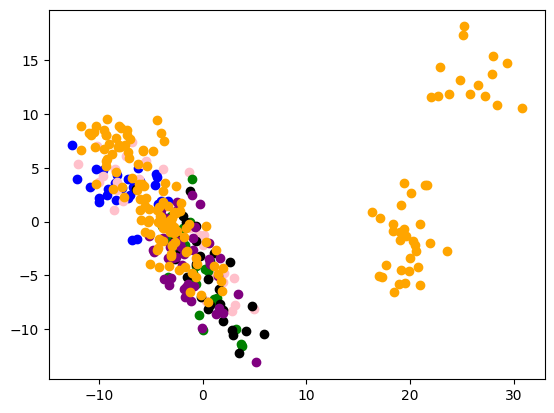

In [9]:
#Center the data

centered_X = X - X.mean(axis=0)

#Compute the new basis Z of the data using PCA to find the 
#top 2 principle components and multiplying that with the centered data

W = components(centered_X, 2)
Z = np.matmul(centered_X, W.T)

zrows, zcols = Z.shape

#Plot the datapoints in the new basis according to their class

for i in range(zrows):
    if (y[i] == 0):
        plt.scatter(Z[i][0], Z[i][1], color = 'blue')
    elif (y[i] == 1):
        plt.scatter(Z[i][0], Z[i][1], color = 'pink')
    elif (y[i] == 2):
        plt.scatter(Z[i][0], Z[i][1], color = 'green')
    elif (y[i] == 3):
        plt.scatter(Z[i][0], Z[i][1], color = 'black')
    elif (y[i] == 4):
        plt.scatter(Z[i][0], Z[i][1], color = 'purple')
    elif(y[i] == 5):
        plt.scatter(Z[i][0], Z[i][1], color = 'orange') 
plt.show()


In [61]:
#Multiclass Perceptron

def perceptron(X, y):
    rows, cols = (6, X.shape[1]+1)
    w = [[0 for i in range(cols)] for j in range(rows)]
    for element in w:
        element[X.shape[1]] = 1
    
    #w = [[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1]]

    biasCol = np.ones((X.shape[0],1), dtype=int)
    newX = np.hstack((X, biasCol))

    for i in range(10):
        #errSum = 0
        picked = []
        pickedFlag = True
        for j in range(newX.shape[0]):
            pickedFlag = True
            while (pickedFlag == True):
                fV = random.choice(newX)
                pickedFlag = False
                for element in picked:
                    if (np.array_equal(element, fV)):
                        pickedFlag = True
                        break
            picked.append(fV)
            for k in range(newX.shape[0]):
                if (np.array_equal(newX[k,:],fV)):
                    index = k
                    break
            
            dict = {}
        
            for k in range (len(w)):
                val = np.matmul(w[k],fV)
                dict[k] = val
            
            y_current = max(dict, key=dict.get)
            y_target = y[index]

            if (y_current != y_target):
                #errSum+=1
                w[y_current] = w[y_current] - fV
                w[y_target] = w[y_target] + fV
        #print('-----Training step ' + str(i+1) + ' finished with total no. of errors =  ' + str(errSum))

    errSum = 0
    picked2 = []
    pickedFlag2 = True
    for j in range(newX.shape[0]):
        pickedFlag2 = True
        while (pickedFlag2 == True):
            fV2 = random.choice(newX)
            pickedFlag2 = False
            for element in picked2:
                if (np.array_equal(element, fV2)):
                    pickedFlag2 = True
                    break
        picked2.append(fV2)
        for k in range(newX.shape[0]):
            if (np.array_equal(newX[k,:],fV2)):
                index = k
                break
                
        dict = {}
            
        for k in range (len(w)):
            val = np.matmul(w[k],fV2)
            dict[k] = val
                
        y_current = max(dict, key=dict.get)
        y_target = y[index]

        if (y_current != y_target):
            errSum+=1

    accuracy = math.floor(((329-errSum)/329)*100)
    return accuracy


In [64]:
accuracyOG = perceptron(X,y)
print("Original Feature Space Accuracy: " + str(accuracyOG) + "%")

centered_X = X - X.mean(axis=0)

for i in range(2, 13):
    W = components(centered_X,i)
    Z = np.matmul(centered_X, W.T)

    accuracy = perceptron(Z,y)
    print(str(i)+"d Feature Space Accuracy:" + str(accuracy) + "%")



Original Feature Space Accuracy: 62%
2d Feature Space Accuracy :37%
3d Feature Space Accuracy :39%
4d Feature Space Accuracy :55%
5d Feature Space Accuracy :54%
6d Feature Space Accuracy :54%
7d Feature Space Accuracy :56%
8d Feature Space Accuracy :61%
9d Feature Space Accuracy :61%
10d Feature Space Accuracy :65%
11d Feature Space Accuracy :69%
12d Feature Space Accuracy :68%
